# Initial Analysis of Olympic Data

## Questions I hope to answer : 
The question that I want to hope to be able to answer is the mininmum amount of information you need to predict the sport that they are in. Is it just height for basketball? 

* how do you want to structure this? 
* is it going to be like. Basketball over everything else? that's too easy because that. 
* if you give it you height and weight.. and nationality? 
* what basketball should it be able to do? 


## More Predictive modelling: 
* what is the minimum number of thigns we need? 
* what are the most different ones? 

## Longer-term goals 

* see if the data can be turned into a webapp where the data can be more fully explored. 



In [264]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os


In [265]:
athlete = pd.read_csv('input/athlete_events.csv')
noc = pd.read_csv('input/noc_regions.csv')

print('Athlete data: \nRows: {}\nCols: {}'.format(athlete.shape[0],athlete.shape[1]))
print(athlete.columns)

print('\nNOC data: \nRows: {}\nCols: {}'.format(noc.shape[0],noc.shape[1]))
print(noc.columns)

Athlete data: 
Rows: 271116
Cols: 15
Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

NOC data: 
Rows: 230
Cols: 3
Index(['NOC', 'region', 'notes'], dtype='object')


In [266]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [267]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


* we first want to deal with missing data

# Filter on athletes with incomplete data

Since we are trying to predict sport based on body measurements and NOC, I want to make sure the following fields have no missing data : Sex, Age, Height, Weight, NOC, Year, Season, Sport. 


In [268]:
athlete_filt = athlete[(athlete['Sex'].notnull()) & (athlete['Age'].notnull()) & (athlete['Height'].notnull())  & (athlete['Weight'].notnull()) & (athlete['NOC'].notnull()) & (athlete['Year'].notnull()) & (athlete['Season'].notnull()) & (athlete['Sport'].notnull())]


At least for the initial analysis, I want to try something simpler. I'll first only look at the summer olympics, and only for the last 50 years (1968). Let's first filter the data, and see how the distribution of athletes lines up. 

In [269]:
AthletesFiltered_Summer = athlete_filt.loc[(athlete_filt['Season'].isin(["Summer"])) & (athlete_filt['Year'] >= 1968)]
print(AthletesFiltered_Summer.shape) 

(142506, 15)


In [170]:
athlete.shape

(271116, 15)

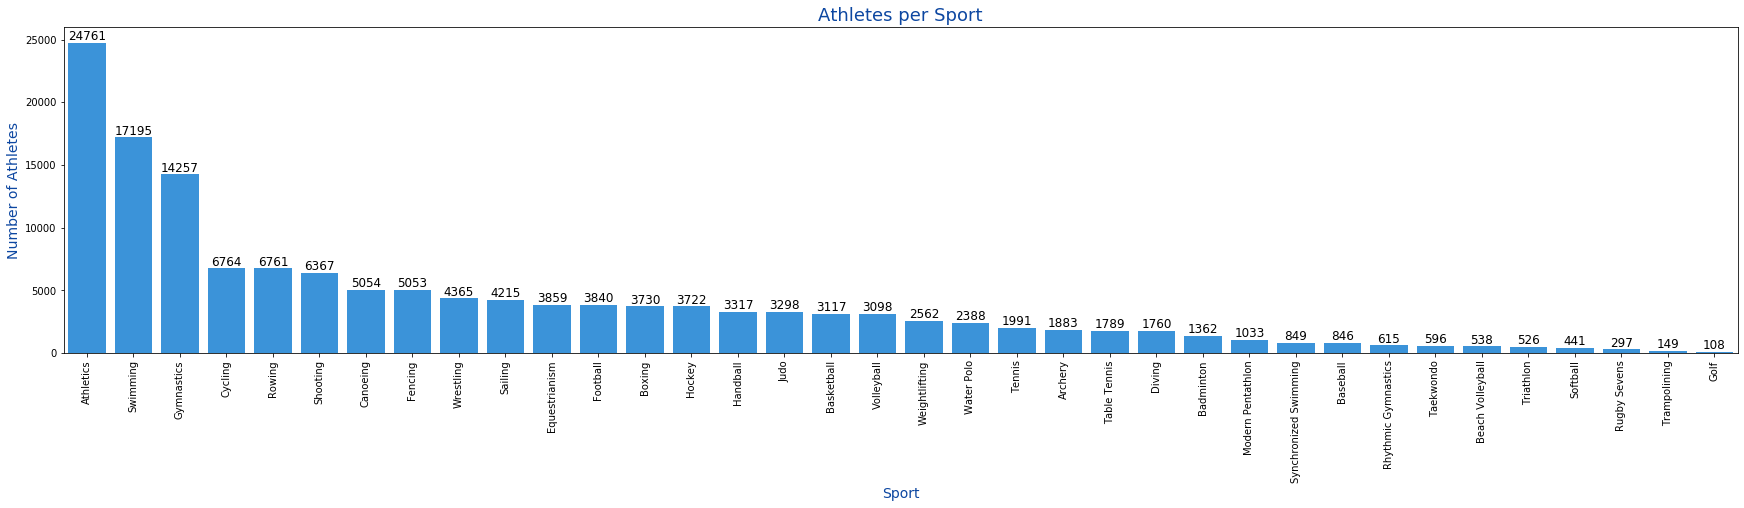

In [271]:
# number of athletes per sport

athletes_ps = AthletesFiltered_Summer[["Sport"]]
athletes_ps = athletes_ps["Sport"].value_counts()


#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html
athletes_per_sport = pd.DataFrame({"Sport":athletes_ps.index, "Athletes":athletes_ps.values})

fig, ax = plt.subplots(figsize=(30,6))
a = sns.barplot(x='Sport', y='Athletes', data=athletes_per_sport, ax=ax, color="#2196F3")
a.set_xticklabels(labels=athletes_per_sport['Sport'],rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Sport', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes per Sport', size=18, color="#0D47A1")
plt.show()





# Look a little more into the Athletics sport

As we see in the graph that the sport is athletics, which is a combination of many sports that are part of the track and field. 

https://tokyo2020.org/en/games/sport/olympic/athletics/
Event Programme
100m (Men/Women)
200m (Men/Women)
400m (Men/Women)
800m (Men/Women)
1,500m (Men/Women)
5,000m (Men/Women)
10,000m (Men/Women)
110m Hurdles (Men)
100m Hurdles (Women)
400m Hurdles (Men/Women)
3,000m Steeplechase (Men/Women)
4 x 100m Relay (Men/Women)
4 x 400m Relay (Men/Women)
4 x 400m Mixed Relay

One concern that I have is that sprinters (100m and 200m) have very different body-types than mid and long-distance runners (10,000m) and this might make the categorizatin difficult. 

![SprintervsMarathoner](MarathonerSprinter.jpg)




To simplify this initial analysis, we will only consider the top-12 most popular sports in terms of number of athletes (excluding athletics).

![NewData](AthletesToAnalyze.png)


In [272]:
# now let's do the actual filtering. 
ToFilter = ['Cycling', 'Rowing']

AthletesFiltered_Summer_Sports = AthletesFiltered_Summer.loc[AthletesFiltered_Summer['Sport'].isin(ToFilter)]


In [273]:
AthletesFiltered_Summer_Sports.shape

(13525, 15)

In [274]:
AthletesFiltered_Summer_Sports.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
93,30,Pepijn Aardewijn,M,30.0,189.0,72.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Double Sculls,NaN
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
176,74,Mara Laura Abalo,F,30.0,182.0,73.0,Argentina,ARG,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxless Pairs,NaN
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver


# Building TF Model

In order to build. WE are going to need to build the categorial variables, an categorial 

In [275]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [276]:
AthletesFiltered_Summer_Sports.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
93,30,Pepijn Aardewijn,M,30.0,189.0,72.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Double Sculls,NaN
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
176,74,Mara Laura Abalo,F,30.0,182.0,73.0,Argentina,ARG,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxless Pairs,NaN
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver


Let’s make analysis simpler by encoding string variables. Country has string labels such as “France, Spain, Germany” while Gender has “Male, Female”

In [277]:
#DataToEncode = pd.DataFrame({"Sex": AthletesFiltered_Summer_Sports['Sex'], "Age": AthletesFiltered_Summer_Sports['Age'], "Height": AthletesFiltered_Summer_Sports['Height'],  "Weight": AthletesFiltered_Summer_Sports['Weight'],  "NOC": AthletesFiltered_Summer_Sports['NOC']})
DataToEncode = pd.DataFrame({"Sex": AthletesFiltered_Summer_Sports['Sex'], "Age": AthletesFiltered_Summer_Sports['Age'], "Height": AthletesFiltered_Summer_Sports['Height'],  "Weight": AthletesFiltered_Summer_Sports['Weight']})

DataToEncode.head()

,Sex,Age,Height,Weight
92,M,26.0,189.0,72.0
93,M,30.0,189.0,72.0
158,M,21.0,198.0,90.0
176,F,30.0,182.0,73.0
195,F,21.0,163.0,60.0


In [278]:
# making the training data into a numeric array
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
my_labelencoder = LabelEncoder()
DataToEncode['Sex'] = my_labelencoder.fit_transform(DataToEncode["Sex"])
#my_labelencoder2 = LabelEncoder()
#DataToEncode['NOC'] = my_labelencoder2.fit_transform(DataToEncode["NOC"])
InputAthleteData = DataToEncode.to_numpy()

In [321]:
# encoding the output variable

# why is this needed?
# Label encoding has introduced new problem in our data... Sports like Sailing and Wrestling have been given numbers, but one is not "higher" than another. These are now converted into dummy varaible
# resource : https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

Y = AthletesFiltered_Summer_Sports["Sport"].values.tolist()
# lab
encoder = LabelEncoder()
dummy_y = encoder.fit_transform(Y)


## Splitting Training and Testing Data

We will make use of ScikitLearn’s ‘train_test_split’ function to divide our data (80:20)

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(InputAthleteData, dummy_y, test_size = 0.2)

## Scaling Input Data

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Standardize features by removing the mean and scaling to unit variance



In [323]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building Neural Model

In [324]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [325]:
# model itself
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [326]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [327]:
y_train

array([0, 0, 1, ..., 1, 1, 1])

In [328]:
# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

/Users/willshin/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
10820/10820 [==============================] - 1s 77us/step - loss: 0.5073 - accuracy: 0.7795
Epoch 2/100
10820/10820 [==============================] - 1s 65us/step - loss: 0.4521 - accuracy: 0.8041
Epoch 3/100
10820/10820 [==============================] - 1s 64us/step - loss: 0.4488 - accuracy: 0.8036
Epoch 4/100
10820/10820 [==============================] - 1s 65us/step - loss: 0.4465 - accuracy: 0.8043
Epoch 5/100
10820/10820 [==============================] - 1s 65us/step - loss: 0.4446 - accuracy: 0.8038
Epoch 6/100
10820/10820 [==============================] - 1s 64us/step - loss: 0.4427 - accuracy: 0.8033
Epoch 7/100
10820/10820 [==============================] - 1s 64us/step - loss: 0.4404 - accuracy: 0.8017
Epoch 8/100
10820/10820 [==============================] - 1s 65us/step - loss: 0.4353 - accuracy: 0.8010
Epoch 9/100
10820/10820 [==============================] - 1s 65us/step - loss: 0.4310 - accuracy: 0.8017
Epoch 10/100
10820/10820 [====================

In [331]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [332]:
cm

array([[1136,  229],
       [ 279, 1061]])

In [333]:
(1136+1061)/(1136 + 229 + 279 + 1061)

0.8121996303142329